In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Sep 18 12:00:51 2022

@author: Gerard
"""

# conda install -c conda-forge mne
# conda install -c conda-forge pyvistaqt
# conda install -c conda-forge ipywidgets
# conda install -c conda-forge darkdetect


import os
import mne
import numpy as np
from mne.decoding import CSP
import matplotlib.pyplot as plt



# Load data sets

In [3]:
data_loo = mne.io.read_epochs_eeglab(input_fname = "./data/Subject_11_H_AEP_Run_01.set")
data_tst = mne.io.read_epochs_eeglab(input_fname = "./data/Subject_10_H_AEP_Run_01.set")

print(data_loo.info)
print(data_tst.info)




Extracting parameters from c:\Users\maxim\OneDrive\Documents\2IA3A\man_machine_interaction\poc_concensiousness\data\Subject_11_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.
Extracting parameters from c:\Users\maxim\OneDrive\Documents\2IA3A\man_machine_interaction\poc_concensiousness\data\Subject_10_H_AEP_Run_01.set...
Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Ready.
<Info | 8 non-empty values
 bads: []
 ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
 chs: 8 EEG
 custom_ref_applied: False
 dig: 8 items (8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq: 256.0 Hz
>
<Info | 8 non-empty values
 bads: []
 ch_names: FCz, C3, Cz, C4, CP1, CPZ, CP2, PZ
 chs: 8 EEG
 custom_ref_applied: False
 dig: 8 items (8 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 8
 projs: []
 sfreq:

    Using multitaper spectrum estimation with 7 DPSS windows


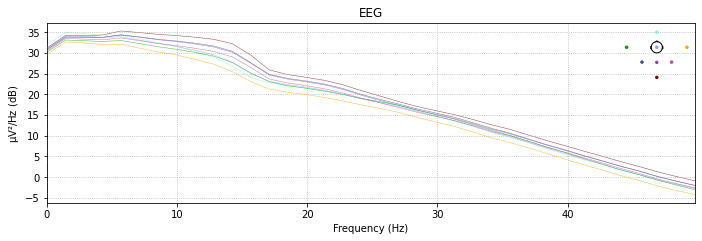

Setting up band-pass filter from 12 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 12.00
- Lower transition bandwidth: 3.00 Hz (-6 dB cutoff frequency: 10.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 283 samples (1.105 sec)



C:\Users\maxim\AppData\Local\Temp\ipykernel_14572\3196495510.py:4: RuntimeWarning: filter_length (283) is longer than the signal (180), distortion is likely. Reduce filter length or filter a longer signal.
  data_loo.filter(12., 30., fir_design='firwin')
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s


    Using multitaper spectrum estimation with 7 DPSS windows


[Parallel(n_jobs=1)]: Done 3840 out of 3840 | elapsed:    0.8s finished


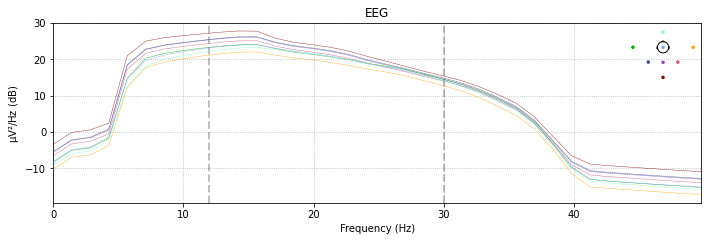

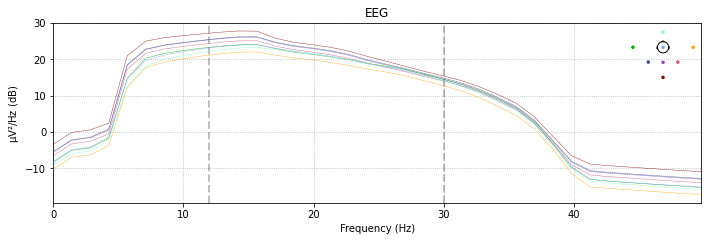

In [4]:
data_loo.plot_psd(fmax=50)

# band-pass filtering in the range 1 Hz - 50 Hz
data_loo.filter(12., 30., fir_design='firwin')

data_loo.plot_psd(fmax=50)


Using matplotlib as 2D backend.


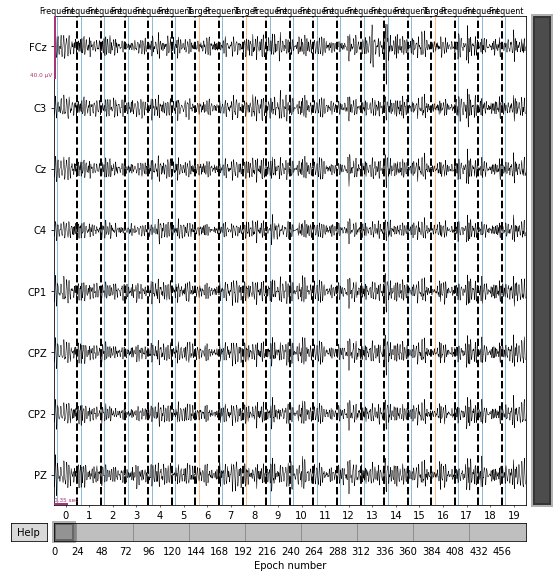

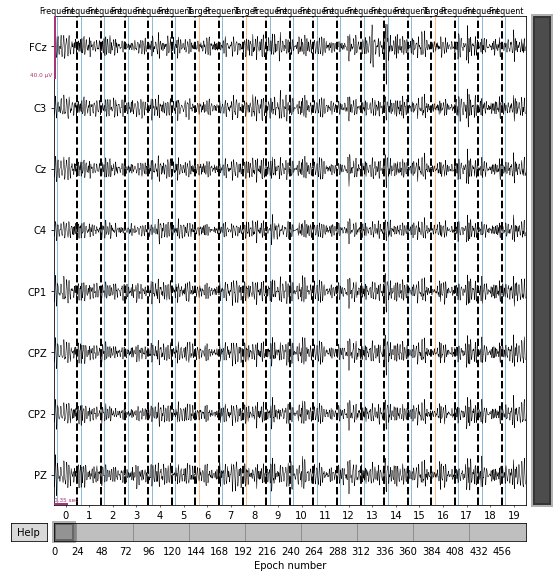

In [5]:
events_num = data_loo.events
event_id = {'Frequent': 1, 'Target': 2}
data_loo.plot(butterfly=False, events=events_num, event_id=event_id)

In [6]:
t = data_loo.times
x = data_loo.get_data()
y = data_loo.events[:,2]
x_csp_average = CSP(n_components=6, transform_into='average_power').fit_transform(x, y)

print(x_csp_average)

Computing rank from data with rank=None
    Using tolerance 5.2e-06 (2.2e-16 eps * 8 dim * 2.9e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 2e-06 (2.2e-16 eps * 8 dim * 1.1e+09  max singular value)
    Estimated rank (mag): 8
    MAG: rank 8 computed from 8 data channels with 0 projectors
Reducing data rank from 8 -> 8
Estimating covariance using EMPIRICAL
Done.
[[-0.91984827 -1.0994891  -0.44389245 -1.09881256 -0.94996168 -0.76107601]
 [-1.65260823 -0.99689012 -1.42181133 -1.52481675 -0.90926574 -0.50535833]
 [-0.74349563 -1.20251824 -0.81334268 -1.41801998 -0.35489059 -1.37815906]
 ...
 [-0.44168215 -0.8208704  -0.60366187 -0.8010683  -1.10877649 -0.92688878]
 [-0.29410073 -1.16009264 -0.45698509 -0.59648567 -1.54305474 -0.25477579]
 [ 0.01988464 -0.30213155 -0.87293284  0.3407486

In [9]:
x_csp_average

array([[-0.91984827, -1.0994891 , -0.44389245, -1.09881256, -0.94996168,
        -0.76107601],
       [-1.65260823, -0.99689012, -1.42181133, -1.52481675, -0.90926574,
        -0.50535833],
       [-0.74349563, -1.20251824, -0.81334268, -1.41801998, -0.35489059,
        -1.37815906],
       ...,
       [-0.44168215, -0.8208704 , -0.60366187, -0.8010683 , -1.10877649,
        -0.92688878],
       [-0.29410073, -1.16009264, -0.45698509, -0.59648567, -1.54305474,
        -0.25477579],
       [ 0.01988464, -0.30213155, -0.87293284,  0.34074869, -0.59116972,
        -0.35993572]])

In [7]:
x

array([[[ 4.01786987e-07, -7.33923251e-08, -7.43542576e-07, ...,
          7.23479428e-07,  1.67638414e-06,  2.12290971e-06],
        [-1.43037170e-07, -7.40171681e-07, -1.61937688e-06, ...,
          1.09732534e-06,  2.62670003e-06,  3.31593573e-06],
        [ 3.57468605e-07, -4.33428821e-07, -1.59675617e-06, ...,
          1.71322172e-06,  2.74770923e-06,  3.02113189e-06],
        ...,
        [-1.47440694e-07, -1.20414242e-06, -2.80251108e-06, ...,
          1.18530567e-06,  2.01926054e-06,  2.24692739e-06],
        [-2.94219300e-07, -1.12943315e-06, -2.42687923e-06, ...,
          1.39652424e-06,  2.20406666e-06,  2.36353866e-06],
        [-4.72603104e-07, -1.59763446e-06, -3.50835102e-06, ...,
          1.29560458e-06,  1.80993310e-06,  1.84765916e-06]],

       [[-2.08650062e-06, -2.12280230e-06, -1.48331547e-06, ...,
         -2.09567577e-06,  1.06786725e-08,  1.86355475e-06],
        [-2.83167447e-06, -3.10499644e-06, -2.43178723e-06, ...,
         -3.63257844e-06, -1.74343157e

In [8]:
y

array([1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,